***CE771A ADJUSTMENT COMPUTATION 2***

***HOME ASSIGNMNET 2***

***DEEPAK KUMAR SINGH***

***20103039***

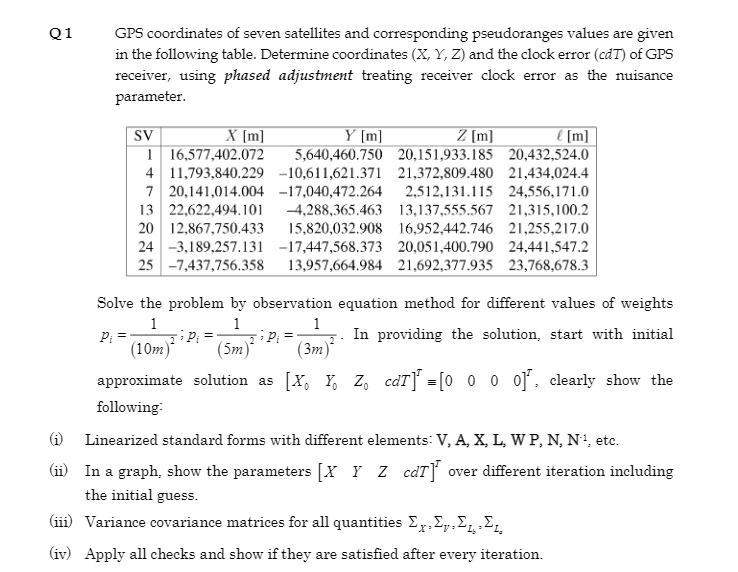

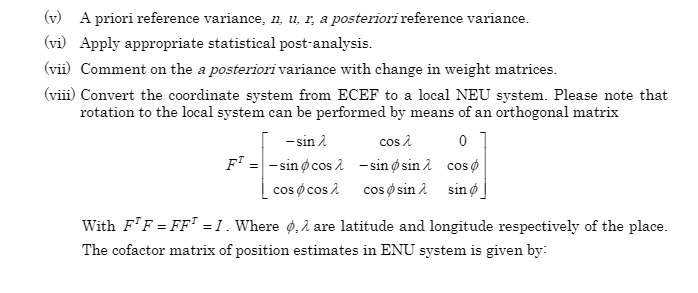

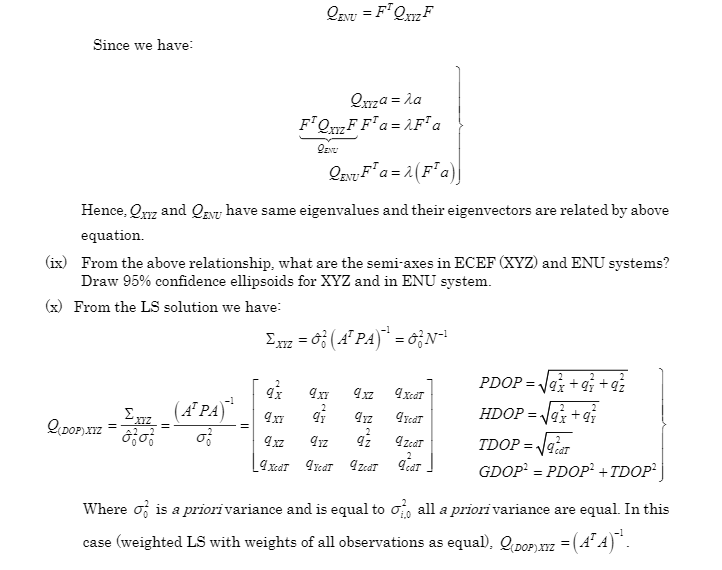

In [10]:
import numpy as np
import sympy as sym
import math
import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [ ]:
x=0;y=0;z=0;t=0

n=7;u=4;r=n-u

print("Initial CARTISIAN COORDINATES for given position : ")
print("x=",x);print("y=",y);print("z=",z)

***Considering P = 1/sqr(5)***

In [ ]:
X=[16577402.072,11793840.229,20141014.004,22622494.101,12867750.433,-3189257.131,-7437756.358]
Y=[5640460.750,-10611621.371,-17040472.264,-4288365.463,15820032.908,-17447568.373,13957664.984]
Z=[20151933.185,21372809.408,2512131.115,13137555.567,16952442.746,20051400.790,21692377.935]

pseudo_range=[[20432524.0,21434024.4,24556171.0,21315100.2,21255217.0,24441547.2,23768678.3]]

P=np.zeros((7,7))
for k in range(7):
    P[k][k]=1/25
c=[1,1,1,1,1,1,1]
print("Weight matrix (P) ");print(P)

In [ ]:
A=[]
d=[]
for i in range(7):
    var=math.sqrt(((X[i]-x)**2)+((Y[i]-y)**2)+((Z[i]-z)**2))
    d.append(var)

for i in range(7):
    col=[]
    col.append((x-X[i])/d[i])
    col.append((y-Y[i])/d[i])
    col.append((z-Z[i])/d[i])
    col.append(c[i])
    A.append(col)

print("Design matrix A");pprint.pprint(A)

In [ ]:
W=np.zeros((1,7))
for i in range(7):
    W[0][i]=d[i]+t-pseudo_range[0][i]
    #col.append(d[i]+0-pseudo_range[0][i])
    #W.append(W)

print("Misclosure W");pprint.pprint(W)
    
L=np.transpose(pseudo_range);print("Observation Matrix L");print(L)

A_trans=np.transpose(A);result1=np.dot(A_trans,P);N=np.dot(result1,A)

print("N");pprint.pprint(N)

In [ ]:
result2=np.dot(A_trans,P);U=np.dot(result2,L)

N=np.matrix(N,dtype='float');N_inv=np.linalg.inv(N)

# Solution matrix
X1=np.dot(N_inv,U);print("Solution Matrix X");pprint.pprint(X1)

print("Del x ",X1[0][0]);print("Del y ",X1[1][0])
print("Del z ",X1[2][0]);print("Del t ",X1[3][0]/299792.458)

In [ ]:
n=int(input("Enter no. of iteration"))
for i in range(n):
    
    x=x+X1[0][0];y=y+X1[1][0];z=z+X1[2][0]
    t=t+X1[3][0]
    #x=np.array(x)
    x=x.item()
    #y=np.array(y)
    y=y.item()
    #z=np.array(z)
    z=z.item()
    #print(x)
    t=t.item()
    
    A=[]
    d=[]
    print("Iteration No.",i+1)
    for i in range(7):
        var=math.sqrt(((X[i]-x)**2)+((Y[i]-y)**2)+((Z[i]-z)**2))
        d.append(var)

    print(d)

    for i in range(7):
        col=[]
        col.append((x-X[i])/d[i])
        col.append((y-Y[i])/d[i])
        col.append((z-Z[i])/d[i])
        col.append(c[i])
        A.append(col)

    print("Design matrix A")
    pprint.pprint(A)

    W=np.zeros((1,7))
    for i in range(7):
        W[0][i]=d[i]+t-pseudo_range[0][i]
        #col.append(d[i]+0-pseudo_range[0][i])
        #W.append(W)

    print("Misclosure W")
    pprint.pprint(W)
    
    L=np.transpose(pseudo_range)
    print("Observation Matrix L")
    print(L)
    
    A_trans=np.transpose(A)
    result1=np.dot(A_trans,P)
    N=np.dot(result1,A)

    print("Variance - covariance matrix N")
    pprint.pprint(N)

    # U_matrix
    result2=np.dot(A_trans,P);U=np.dot(result2,L)
    
    N=np.matrix(N,dtype='float')
    N_inv=np.linalg.inv(N)
    #X
    X1=np.dot(N_inv,U)
    print("Solution Matrix X")
    pprint.pprint(X1)
    print("Del x ",X1[0][0])
    print("Del y ",X1[1][0])
    print("Del z ",X1[2][0])
    print("Del t ",X1[3][0]/299792.458)


    

In [ ]:
# Residual matrix
var_3=np.dot(A,X1);V=np.subtract(var_3,L)

V=np.matrix(V,dtype='float');print("Residual V");pprint.pprint(V)

La=np.add(L,V);print("Adjusted control points La");pprint.pprint(La)

print("Quality Matrix")
#Quality matrix

QLb=np.linalg.inv(P);Qx=N_inv

var_4=np.dot(A,N_inv);Qlo=np.dot(var_4,A_trans)

Qv=QLb-Qlo

QLo=np.matrix(Qlo,dtype='float')
Qv=np.matrix(Qv,dtype='float')
print("Quality Matrix");print("QLb")
pprint.pprint(QLb);print("Qx")
pprint.pprint(Qx);print("QLo")
pprint.pprint(Qlo)
print("Qv");pprint.pprint(Qv)

V_trans=np.transpose(V);var_5=np.dot(V_trans,P)
Pnum=np.dot(var_5,V);sigma=Pnum/r

print("Posteriori reference variance : ",sigma)

s=np.ravel(sigma);s=s[0]

print("Quality Matrix sigma");Sl=np.dot(s,QLb)
print("Sigma Lb");pprint.pprint(Sl)

Sx=np.dot(s,Qx);print("Sigma Lx");pprint.pprint(Sx)

Sla=np.dot(s,Qlo);Sla=np.matrix(Sla,dtype='float')
print("Sigma La");pprint.pprint(Sla)

Sv=np.dot(s,Qv);print("Sigma v");pprint.pprint(Sv)


***Considering P = 1/sqr(3)***

In [ ]:
#P=1/9

x=0;y=0;z=0;t=0
n=7;u=4;r=n-u

print("Initial CARTISIAN COORDINATES for given position : ")
print("x=",x);print("y=",y);print("z=",z)

X=[16577402.072,11793840.229,20141014.004,22622494.101,12867750.433,-3189257.131,-7437756.358]
Y=[5640460.750,-10611621.371,-17040472.264,-4288365.463,15820032.908,-17447568.373,13957664.984]
Z=[20151933.185,21372809.408,2512131.115,13137555.567,16952442.746,20051400.790,21692377.935]

pseudo_range=[[20432524.0,21434024.4,24556171.0,21315100.2,21255217.0,24441547.2,23768678.3]]

P=np.zeros((7,7))
for k in range(7):
    P[k][k]=1/9
c=[1,1,1,1,1,1,1]
print("Weight matrix (P) ");print(P)

A=[]
d=[]
for i in range(7):
    var=math.sqrt(((X[i]-x)**2)+((Y[i]-y)**2)+((Z[i]-z)**2))
    d.append(var)

for i in range(7):
    col=[]
    col.append((x-X[i])/d[i])
    col.append((y-Y[i])/d[i])
    col.append((z-Z[i])/d[i])
    col.append(c[i])
    A.append(col)

print("Design matrix A");pprint.pprint(A)

W=np.zeros((1,7))
for i in range(7):
    W[0][i]=d[i]+t-pseudo_range[0][i]
    #col.append(d[i]+0-pseudo_range[0][i])
    #W.append(W)

print("Misclosure W");pprint.pprint(W)
    
L=np.transpose(pseudo_range);print("Observation Matrix L");print(L)

A_trans=np.transpose(A);result1=np.dot(A_trans,P);N=np.dot(result1,A)

print("N");pprint.pprint(N)

#U_matrix
result2=np.dot(A_trans,P)
U=np.dot(result2,L)


N=np.matrix(N,dtype='float');N_inv=np.linalg.inv(N)
#X_matrix
X1=np.dot(N_inv,U);print("Solution Matrix X");pprint.pprint(X1)

print("Del x ",X1[0][0]);print("Del y ",X1[1][0])
print("Del z ",X1[2][0]);print("Del t ",X1[3][0]/299792.458)


n=int(input("Enter no. of iteration"))
for i in range(n):
    
    x=x+X1[0][0]
    y=y+X1[1][0]
    z=z+X1[2][0]
    t=t+X1[3][0]
    #x=np.array(x)
    x=x.item()
    #y=np.array(y)
    y=y.item()
    #z=np.array(z)
    z=z.item()
    #print(x)
    t=t.item()
    A=[]
    d=[]
    print("Iteration No.",i+1)
    for i in range(7):
        var=math.sqrt(((X[i]-x)**2)+((Y[i]-y)**2)+((Z[i]-z)**2))
        d.append(var)

    print(d)

    for i in range(7):
        col=[]
        col.append((x-X[i])/d[i])
        col.append((y-Y[i])/d[i])
        col.append((z-Z[i])/d[i])
        col.append(c[i])
        A.append(col)

    print("Design matrix A")
    pprint.pprint(A)

    W=np.zeros((1,7))
    for i in range(7):
        W[0][i]=d[i]+t-pseudo_range[0][i]
        #col.append(d[i]+0-pseudo_range[0][i])
        #W.append(W)

    print("Misclosure W")
    pprint.pprint(W)
    
    L=np.transpose(pseudo_range)
    print("Observation Matrix L")
    print(L)
    
    A_trans=np.transpose(A)
    result1=np.dot(A_trans,P)
    N=np.dot(result1,A)

    print("Variance - covariance matrix N")
    pprint.pprint(N)

    #U_matrix
    result2=np.dot(A_trans,P);U=np.dot(result2,L)

    


    N=np.matrix(N,dtype='float')
    N_inv=np.linalg.inv(N)
    #X
    X1=np.dot(N_inv,U)
    print("Solution Matrix X")
    pprint.pprint(X1)
    print("Del x ",X1[0][0]);print("Del y ",X1[1][0])
    print("Del z ",X1[2][0]);print("Del t ",X1[3][0]/299792.458)
    
    

#Residual matrix
var_3=np.dot(A,X1);V=np.subtract(var_3,L)

V=np.matrix(V,dtype='float');print("Residual V")
pprint.pprint(V)

La=np.add(L,V);print("Adjusted control points La")
pprint.pprint(La)

print("Quality Matrix")
#Quality matrix
QLb=np.linalg.inv(P);Qx=N_inv

var_4=np.dot(A,N_inv);Qlo=np.dot(var_4,A_trans)

Qv=QLb-Qlo

QLo=np.matrix(Qlo,dtype='float')
Qv=np.matrix(Qv,dtype='float')
print("Quality Matrix");print("QLb")
pprint.pprint(QLb);print("Qx")
pprint.pprint(Qx);print("QLo")
pprint.pprint(Qlo);print("Qv")
pprint.pprint(Qv)

V_trans=np.transpose(V);var_5=np.dot(V_trans,P)
Pnum=np.dot(var_5,V);sigma=Pnum/r

print("Posteriori reference variance : ",sigma)

s=np.ravel(sigma)
s=s[0]

print("Quality Matrix sigma");Sl=np.dot(s,QLb)
print("Sigma Lb");pprint.pprint(Sl)

Sx=np.dot(s,Qx);print("Sigma Lx");pprint.pprint(Sx)

Sla=np.dot(s,Qlo);Sla=np.matrix(Sla,dtype='float')
print("Sigma La");pprint.pprint(Sla)

Sv=np.dot(s,Qv);print("Sigma v");pprint.pprint(Sv)


***Considering P = 1/sqr(10)***

In [ ]:
#P=1/100
x=0;y=0;z=0;t=0
n=7;u=4;r=n-u

print("Initial CARTISIAN COORDINATES for given position : ")
print("x=",x);print("y=",y);print("z=",z)

X=[16577402.072,11793840.229,20141014.004,22622494.101,12867750.433,-3189257.131,-7437756.358]
Y=[5640460.750,-10611621.371,-17040472.264,-4288365.463,15820032.908,-17447568.373,13957664.984]
Z=[20151933.185,21372809.408,2512131.115,13137555.567,16952442.746,20051400.790,21692377.935]

pseudo_range=[[20432524.0,21434024.4,24556171.0,21315100.2,21255217.0,24441547.2,23768678.3]]

P=np.zeros((7,7))
for k in range(7):
    P[k][k]=1/100
c=[1,1,1,1,1,1,1]
print("Weight matrix (P) ");print(P)

A=[]
d=[]
for i in range(7):
    var=math.sqrt(((X[i]-x)**2)+((Y[i]-y)**2)+((Z[i]-z)**2))
    d.append(var)

for i in range(7):
    col=[]
    col.append((x-X[i])/d[i])
    col.append((y-Y[i])/d[i])
    col.append((z-Z[i])/d[i])
    col.append(c[i])
    A.append(col)

print("Design matrix A");pprint.pprint(A)

W=np.zeros((1,7))
for i in range(7):
    W[0][i]=d[i]+t-pseudo_range[0][i]
    #col.append(d[i]+0-pseudo_range[0][i])
    #W.append(W)

print("Misclosure W");pprint.pprint(W)
    
L=np.transpose(pseudo_range);print("Observation Matrix L");print(L)

A_trans=np.transpose(A);result1=np.dot(A_trans,P);N=np.dot(result1,A)

print("N");pprint.pprint(N)

#U_matrix
result2=np.dot(A_trans,P)
U=np.dot(result2,L)

N=np.matrix(N,dtype='float')
N_inv=np.linalg.inv(N)
#X_matrix
X1=np.dot(N_inv,U);print("Solution Matrix X");pprint.pprint(X1)

print("Del x ",X1[0][0]);print("Del y ",X1[1][0])
print("Del z ",X1[2][0]);print("Del t ",X1[3][0]/299792.458)

X_p=[];Y_p=[];Z_p=[]
X_p.append(x);Y_p.append(y);Z_p.append(z)

n=int(input("Enter no. of iteration"))
for i in range(n):
    
    x=x+X1[0][0]
    y=y+X1[1][0]
    z=z+X1[2][0]
    t=t+X1[3][0]
    #x=np.array(x)
    x=x.item()
    #y=np.array(y)
    y=y.item()
    #z=np.array(z)
    z=z.item()
    #print(x)
    t=t.item()
    X_p.append(x)
    Y_p.append(y)
    Z_p.append(z)
    
    A=[]
    d=[]
    print("Iteration No.",i+1)
    for i in range(7):
        var=math.sqrt(((X[i]-x)**2)+((Y[i]-y)**2)+((Z[i]-z)**2))
        d.append(var)

    print(d)

    for i in range(7):
        col=[]
        col.append((x-X[i])/d[i])
        col.append((y-Y[i])/d[i])
        col.append((z-Z[i])/d[i])
        col.append(c[i])
        A.append(col)

    print("Design matrix A")
    pprint.pprint(A)

    W=np.zeros((1,7))
    for i in range(7):
        W[0][i]=d[i]+t-pseudo_range[0][i]
        #col.append(d[i]+0-pseudo_range[0][i])
        #W.append(W)

    print("Misclosure W")
    pprint.pprint(W)
    
    L=np.transpose(pseudo_range)
    print("Observation Matrix L")
    print(L)
    
    A_trans=np.transpose(A)
    result1=np.dot(A_trans,P)
    N=np.dot(result1,A)

    print("Variance - covariance matrix N")
    pprint.pprint(N)

    #U
    result2=np.dot(A_trans,P)
    #print("r2=",r2)
    U=np.dot(result2,L)

    #print("U")
    #pprint.pprint(U)


    N=np.matrix(N,dtype='float')
    N_inv=np.linalg.inv(N)
    #X
    X1=np.dot(N_inv,U)
    print("Solution Matrix X")
    pprint.pprint(X1)
    print("Del x ",X1[0][0])
    print("Del y ",X1[1][0])
    print("Del z ",X1[2][0])
    print("Del t ",X1[3][0]/299792.458)

#Residual matrix
var_3=np.dot(A,X1)
V=np.subtract(var_3,L)

V=np.matrix(V,dtype='float');print("Residual V");pprint.pprint(V)

La=np.add(L,V);print("Adjusted control points La");pprint.pprint(La)

print("Quality Matrix")
#Quality matrix
QLb=np.linalg.inv(P);Qx=N_inv

var_4=np.dot(A,N_inv);Qlo=np.dot(var_4,A_trans)

Qv=QLb-Qlo

QLo=np.matrix(Qlo,dtype='float');Qv=np.matrix(Qv,dtype='float')
print("Quality Matrix");print("QLb")
pprint.pprint(QLb);print("Qx")
pprint.pprint(Qx);print("QLo")
pprint.pprint(Qlo);print("Qv")
pprint.pprint(Qv)

V_trans=np.transpose(V);var_5=np.dot(V_trans,P)
Pnum=np.dot(var_5,V);sigma=Pnum/r

print("Posteriori reference variance : ",sigma)

s=np.ravel(sigma)
s=s[0]

print("Quality Matrix sigma");Sl=np.dot(s,QLb)
print("Sigma Lb");pprint.pprint(Sl)

Sx=np.dot(s,Qx);print("Sigma Lx");pprint.pprint(Sx)

Sla=np.dot(s,Qlo);Sla=np.matrix(Sla,dtype='float')
print("Sigma La");pprint.pprint(Sla)

Sv=np.dot(s,Qv);print("Sigma v");pprint.pprint(Sv)

***Converting ECEF TO ENU Coordinate System***

***Finding PDOP,TDOP,HDOP,GDOP*** 

In [ ]:
Lambda=math.atan(X1[1][0]/X1[0][0])
temp_1=math.sqrt((X1[1][0]**2)+(X1[0][0]))
phi=math.atan(temp_1/X1[3][0])

F=[[-math.sin(Lambda),math.cos(Lambda),0],
   [-math.sin(phi)*math.cos(Lambda),-math.sin(phi)*math.sin(Lambda),math.cos(phi)],
   [math.cos(phi)*math.cos(Lambda),math.cos(phi)*math.sin(Lambda),math.sin(phi)]]

F_trans=np.transpose(F);print("Rotation matrix F")
pprint.pprint(F);print("F_trans")
pprint.pprint(F_trans)

print("XYZ and cdT");pprint.pprint(X1)
X=np.delete(X1,3,0);print("XYZ")
print(X)

ENU=np.dot(F,X);print("ENU")
pprint.pprint(ENU)

print("Qxyzt");pprint.pprint(Qx)

Qxyz=np.delete(Qx,3,0);Qxyz=np.delete(Qxyz,3,1)
print("Qxyz");print(Qxyz)

temp_1=np.dot(F_trans,Qxyz);Qenu=np.dot(temp_1,F)

print("Qenu");pprint.pprint(Qenu)

temp_xy=np.delete(Qxyz,2,0);temp_xy=np.delete(temp_xy,2,1)

GDOP_sq=np.trace(Qx);GDOP=math.sqrt(GDOP_sq)
PDOP_sq=np.trace(Qxyz);PDOP=math.sqrt(PDOP_sq)
HDOP_sq=np.trace(temp_xy);HDOP=np.sqrt(HDOP_sq)
TDOP_sq=GDOP_sq-PDOP_sq;TDOP=math.sqrt(TDOP_sq)

print("PDOP",PDOP);print("HDOP",HDOP)
print("TDOP",TDOP);print("GDOP",GDOP)

#Ploting X,Y,Z
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_trisurf(X_p,Y_p, Z_p, color='white', edgecolors='grey', alpha=0.5)
ax.scatter(X_p, Y_p, Z_p, c='Blue')
plt.show()


***THANK YOU***